Danish Deepak

## Project 18: Predict Job Change by Data Scientist

In [1]:
# Importing the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Importing the datasets

df_train = pd.read_csv('aug_train.csv')
df_test  = pd.read_csv('aug_test.csv')

### 1) Data exploration 

#### 1.1) Training data

In [3]:
# Looking at the training data
df_train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
# Checking for null values and learning the dtypes of columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [5]:
# Dropping the null values
df_train = df_train.dropna()

In [6]:
# Checking for any null values again
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8955 entries, 1 to 19155
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             8955 non-null   int64  
 1   city                    8955 non-null   object 
 2   city_development_index  8955 non-null   float64
 3   gender                  8955 non-null   object 
 4   relevent_experience     8955 non-null   object 
 5   enrolled_university     8955 non-null   object 
 6   education_level         8955 non-null   object 
 7   major_discipline        8955 non-null   object 
 8   experience              8955 non-null   object 
 9   company_size            8955 non-null   object 
 10  company_type            8955 non-null   object 
 11  last_new_job            8955 non-null   object 
 12  training_hours          8955 non-null   int64  
 13  target                  8955 non-null   float64
dtypes: float64(2), int64(2), object(10)
mem

In [7]:
# Basic statistical analysis of numerical columns
df_train.describe()

,enrollee_id,city_development_index,training_hours,target
count,8955.000000,8955.000000,8955.000000,8955.000000
mean,16869.638749,0.844570,65.074930,0.165606
std,9963.804718,0.116178,60.235087,0.371747
min,2.000000,0.448000,1.000000,0.000000
25%,8150.000000,0.794000,23.000000,0.000000
50%,16924.000000,0.910000,47.000000,0.000000
75%,25902.000000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [8]:
# Basic statistical analysis of categorical columns 
df_train.drop(['enrollee_id', 'city_development_index', 'training_hours', 'target'], axis = 1).describe()

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,8955,8955,8955,8955,8955,8955,8955,8955,8955,8955
unique,116,3,2,3,3,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,2426,8073,7851,7594,6252,7989,1881,1986,6794,3838


#### 1.2) Testing data

In [9]:
# Looking at the testing data
df_test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [10]:
# Checking for null values and learning the dtypes of the columns
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


In [11]:
# Dropping the null values
df_test = df_test.dropna()

In [12]:
# Checking the null values again
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1019 entries, 3 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             1019 non-null   int64  
 1   city                    1019 non-null   object 
 2   city_development_index  1019 non-null   float64
 3   gender                  1019 non-null   object 
 4   relevent_experience     1019 non-null   object 
 5   enrolled_university     1019 non-null   object 
 6   education_level         1019 non-null   object 
 7   major_discipline        1019 non-null   object 
 8   experience              1019 non-null   object 
 9   company_size            1019 non-null   object 
 10  company_type            1019 non-null   object 
 11  last_new_job            1019 non-null   object 
 12  training_hours          1019 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 111.5+ KB


In [13]:
# Basic statistical analysis of the numerical columns
df_test.describe()

,enrollee_id,city_development_index,training_hours
count,1019.000000,1019.000000,1019.00000
mean,16877.823356,0.839644,64.88420
std,10022.496322,0.117586,60.81398
min,30.000000,0.487000,1.00000
25%,7927.000000,0.767000,23.00000
50%,16462.000000,0.910000,47.00000
75%,25944.500000,0.920000,86.00000
max,33353.000000,0.949000,334.00000


In [14]:
# Basic statistical analysis of the categorical column
df_test.drop(['enrollee_id', 'city_development_index', 'training_hours'], axis = 1).describe()

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,1019,1019,1019,1019,1019,1019,1019,1019,1019,1019
unique,88,3,2,3,3,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,265,924,875,846,697,897,234,235,776,431


### 2) Data visualization

#### 2.1) Training data

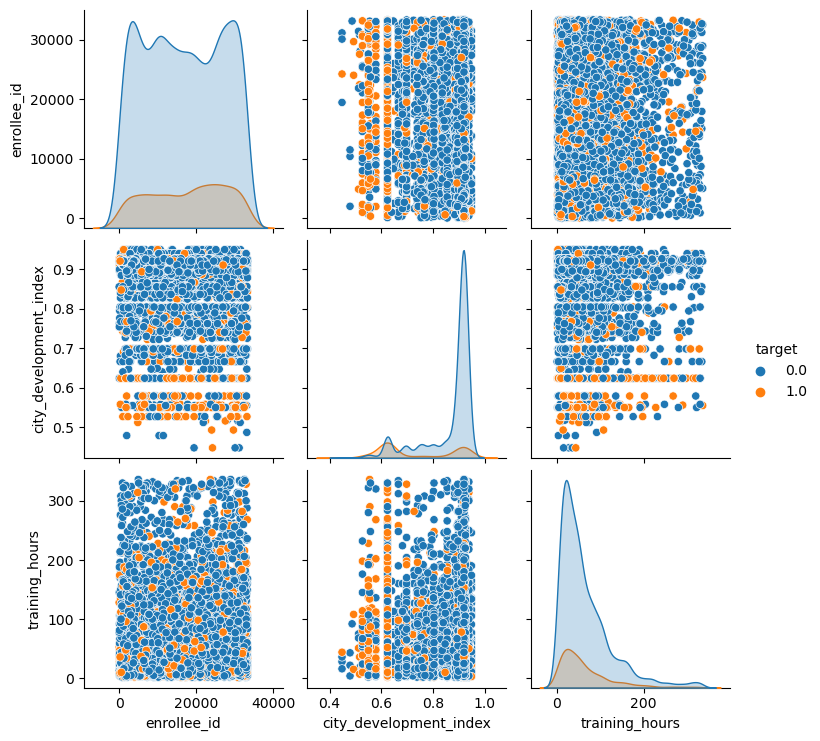

In [15]:
# Visualizing the relationship between numerical features
sns.pairplot(df_train, hue = 'target')

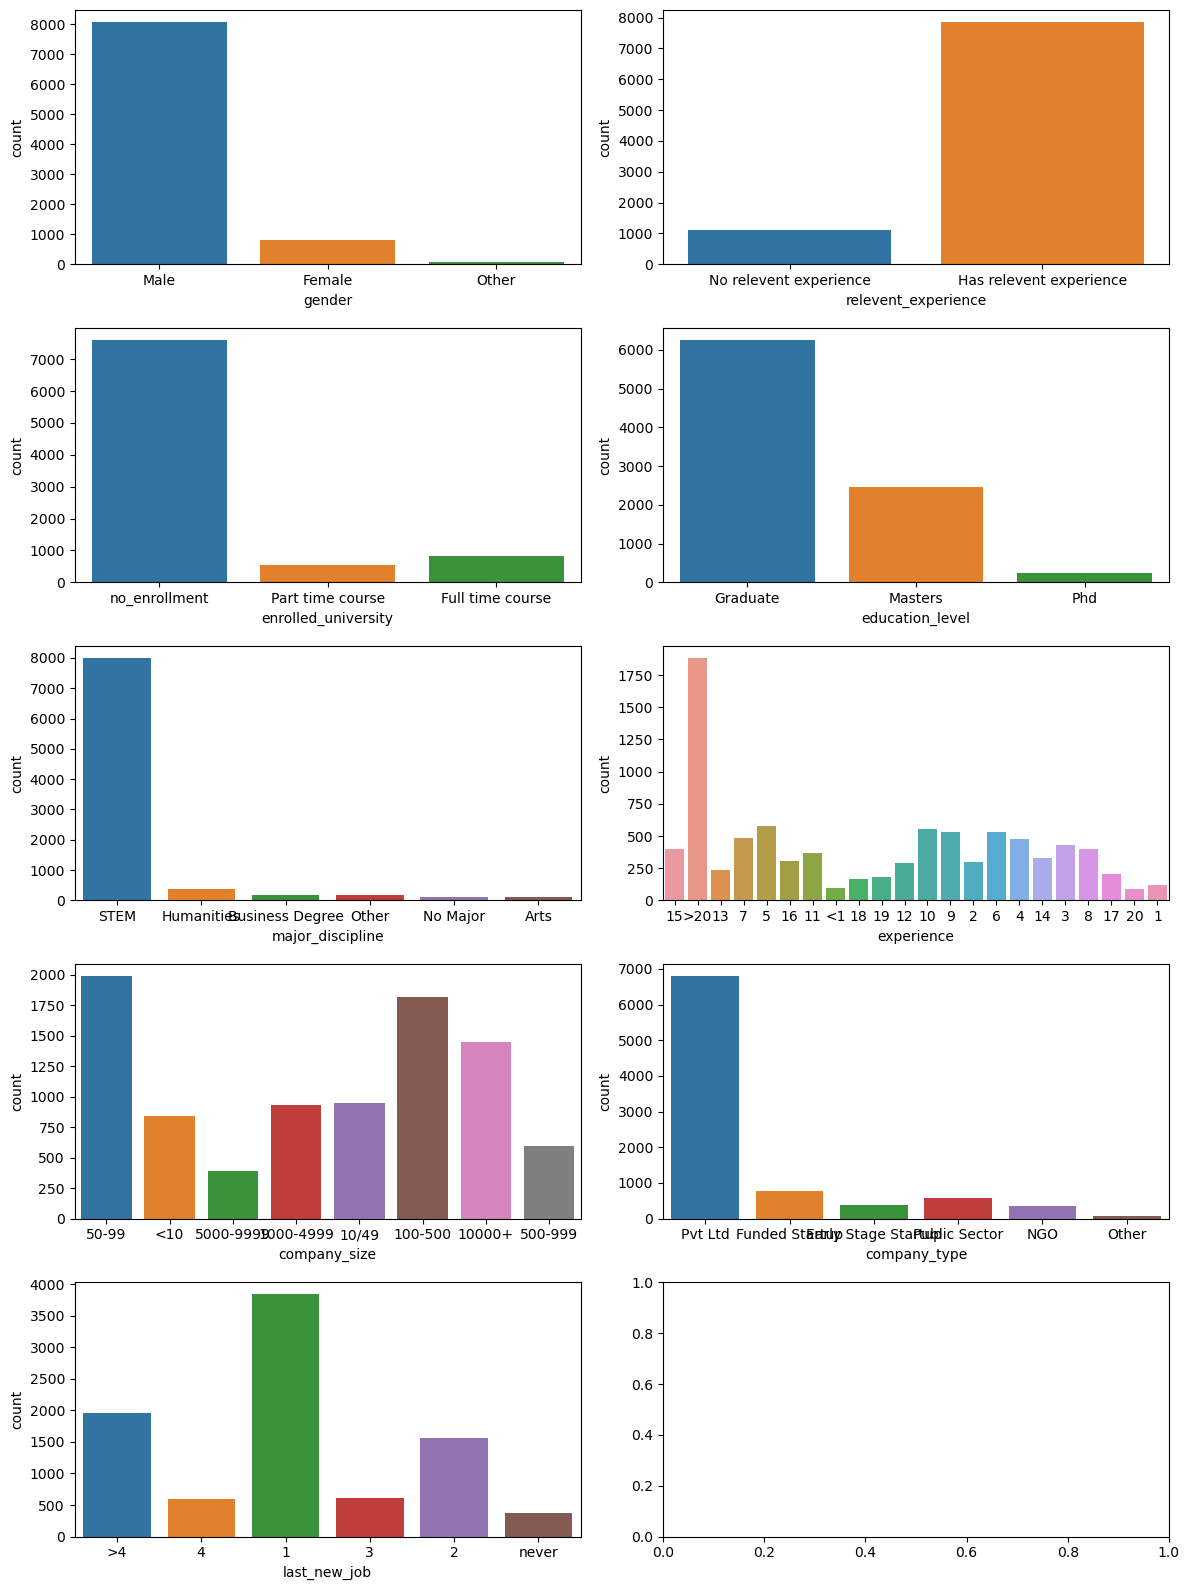

In [16]:
# Viualizing the distribution of data in each categorical column
fig, ax = plt.subplots(5,2, figsize = (12,16))
ax = ax.flatten()

for i, column in enumerate(df_train.drop(['city', 'enrollee_id', 'city_development_index', 'training_hours', 'target'], axis = 1).columns):
    sns.countplot(x = column, data = df_train, ax = ax[i])

plt.tight_layout()

#### 2.2) Testing Data

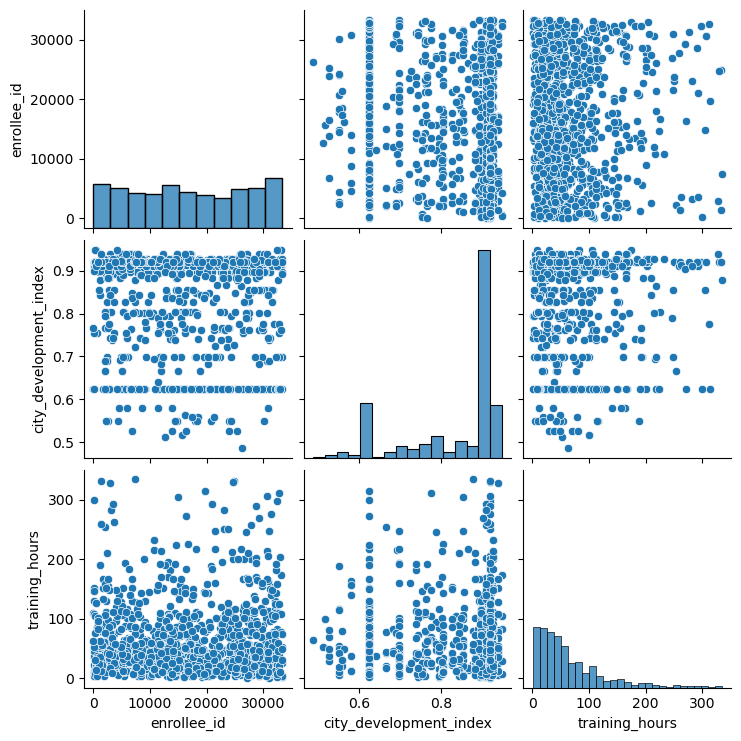

In [17]:
# Visualizing the relationship between numerical columns
sns.pairplot(df_test)

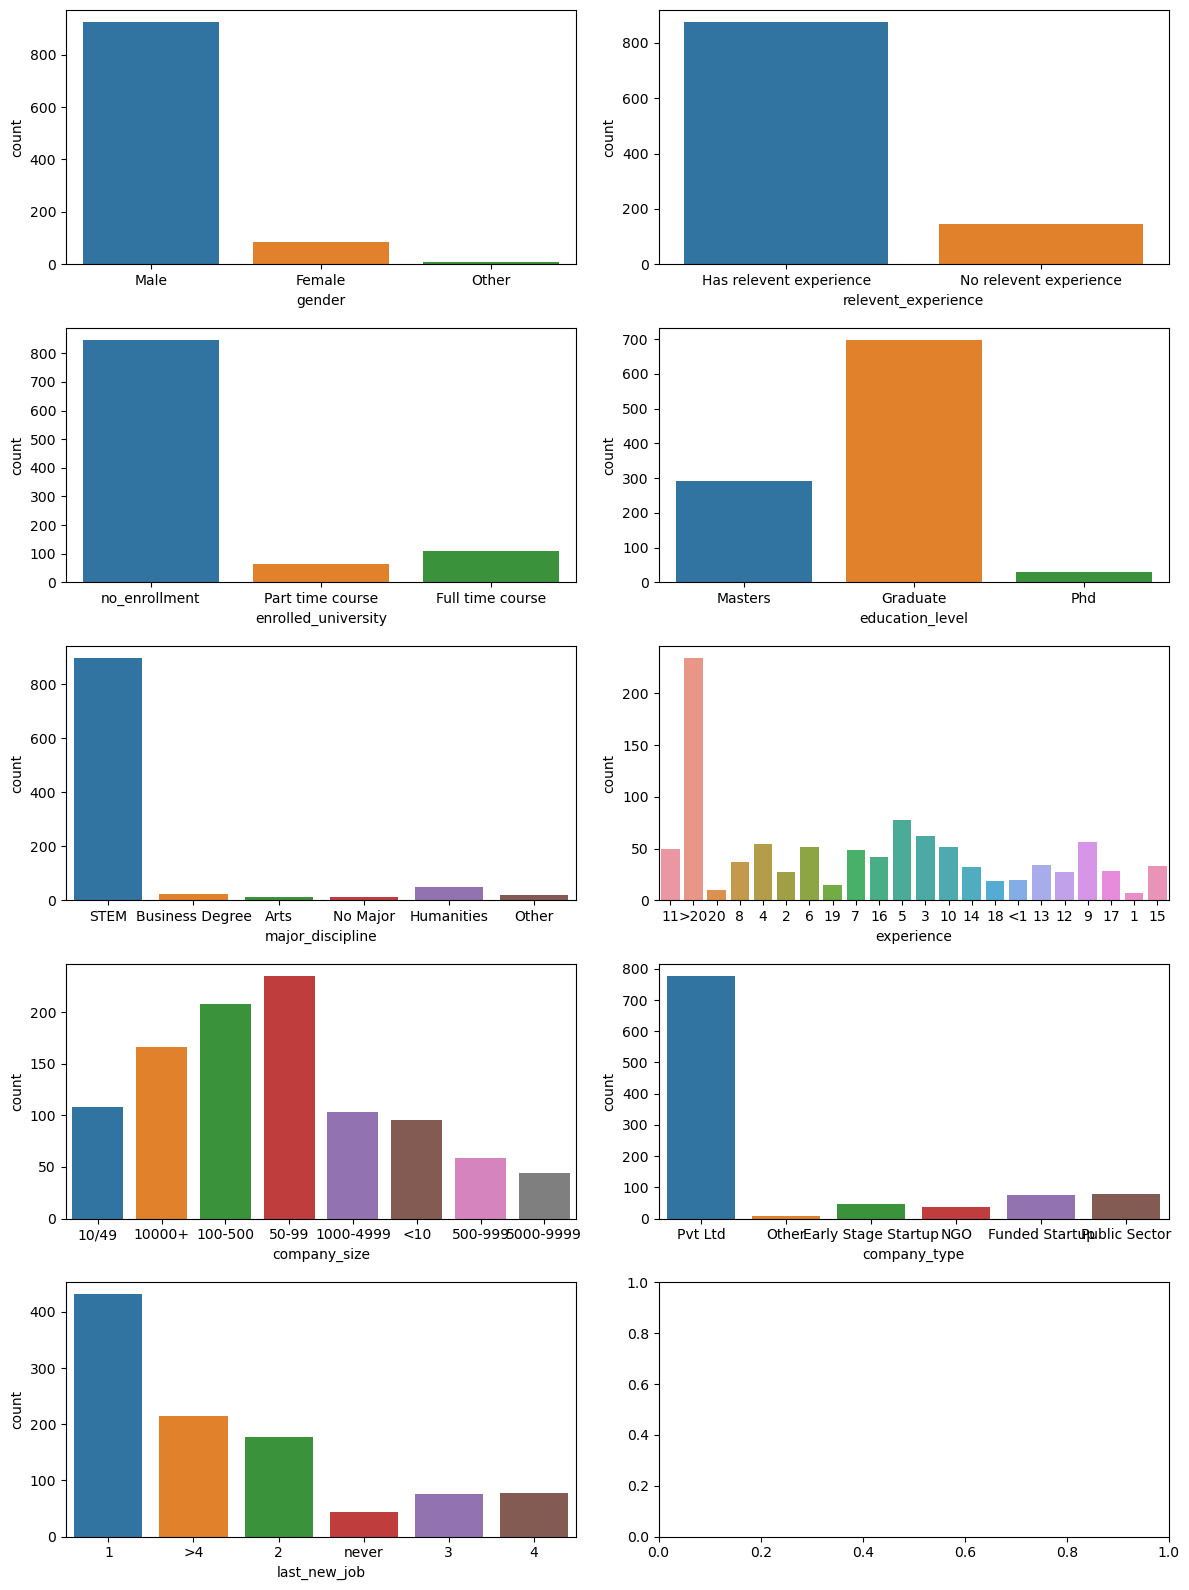

In [18]:
# Visualizing the distribution of data of categorical column
fig, ax = plt.subplots(5,2, figsize = (12,16))
ax = ax.flatten()

for i, column in enumerate(df_test.drop(['city','enrollee_id', 'city_development_index', 'training_hours'], axis = 1).columns):
    sns.countplot(x = column, data = df_test, ax = ax[i])

plt.tight_layout()

### 3) Data transformation

#### 3.1) Training data

In [19]:
# label encoding of categorical values 
le = LabelEncoder()
df_train_encoded = df_train.drop('target', axis = 1).copy()
for column in df_train_encoded.columns:
    if df_train[column].dtype == object:
        df_train_encoded[column] = le.fit_transform(df_train_encoded[column])

df_train_encoded.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
1,29725,72,0.776,1,1,2,0,5,6,4,5,4,47
4,666,48,0.767,1,0,2,1,5,21,4,1,3,8
7,402,78,0.762,1,0,2,0,5,4,7,5,4,18
8,27107,5,0.920,1,0,2,0,5,17,4,5,0,46
11,23853,5,0.920,1,0,2,0,5,15,6,5,0,108


In [20]:
# Scaler transformation of the dataset
scaler = StandardScaler()
train = scaler.fit_transform(df_train_encoded)

train = pd.DataFrame(train, columns = [df_train_encoded.columns])

train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,1.290278,0.967986,-0.590248,0.267403,2.666723,0.402198,-0.626387,0.317543,-0.992973,0.468884,0.498507,1.375772,-0.300090
1,-1.626341,0.248843,-0.667720,0.267403,-0.374992,0.402198,1.270568,0.317543,1.184322,0.468884,-2.113239,0.802960,-0.947589
2,-1.652838,1.147772,-0.710760,0.267403,-0.374992,0.402198,-0.626387,0.317543,-1.283279,1.923958,0.498507,1.375772,-0.781564
3,1.027512,-1.039623,0.649299,0.267403,-0.374992,0.402198,-0.626387,0.317543,0.603710,0.468884,0.498507,-0.915476,-0.316692
4,0.700912,-1.039623,0.649299,0.267403,-0.374992,0.402198,-0.626387,0.317543,0.313404,1.438933,0.498507,-0.915476,0.712665


### 3.2) Testing Data

In [21]:
# Label encoding
df_test_encoded = df_test.copy()
for column in df_test_encoded.columns:
    if df_test[column].dtype == object:
        df_test_encoded[column] = le.fit_transform(df_test_encoded[column])
        
df_test_encoded.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
3,27385,16,0.827,1,0,2,1,5,2,0,5,0,39
4,27724,4,0.920,1,0,2,0,5,21,3,5,4,72
11,9272,81,0.698,1,0,2,0,5,12,0,5,1,51
12,14249,58,0.762,1,0,2,0,5,18,1,3,5,48
16,7865,43,0.624,1,0,2,1,5,14,1,5,0,4


In [22]:
# Scaler Transformation
test = scaler.fit_transform(df_test_encoded)
test = pd.DataFrame(test, columns = [df_test_encoded.columns])

test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,1.048874,-0.528801,-0.107581,0.248377,-0.405674,0.429781,1.219453,0.33862,-1.645724,-1.471232,0.483046,-0.924178,-0.425838
1,1.082715,-1.037950,0.683718,0.248377,-0.405674,0.429781,-0.646347,0.33862,1.149264,-0.012407,0.483046,1.384001,0.117067
2,-0.759248,2.229085,-1.205188,0.248377,-0.405674,0.429781,-0.646347,0.33862,-0.174678,-1.471232,0.483046,-0.347133,-0.228418
3,-0.262421,1.253218,-0.660639,0.248377,-0.405674,0.429781,-0.646347,0.33862,0.707950,-0.984957,-0.859994,1.961046,-0.277773
4,-0.899701,0.616782,-1.834823,0.248377,-0.405674,0.429781,1.219453,0.33862,0.119532,-0.984957,0.483046,-0.924178,-1.001646


### 4) Performing data modelling using multiple classification ML algorithms

In [23]:
# Fitting the data as train and test sets
X = train
y = df_train['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)

In [24]:
# Initializing the ML Algorithms

svc = SVC()
rf  = RandomForestClassifier()
knn = KNeighborsClassifier()
dt  = DecisionTreeClassifier()

In [25]:
# Training the models

svc.fit(X_train,y_train)
rf.fit(X_train,y_train)
knn.fit(X_train,y_train)
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [26]:
# Predicting the test sets

svc_pred = svc.predict(X_test)
rf_pred = rf.predict(X_test)
knn_pred = knn.predict(X_test)
dt_pred = dt.predict(X_test)

In [27]:
print('Confusion Matrix and accuracy score for SVC')
print('')
print('Confusion Matrix: ')
print(confusion_matrix(y_test, svc_pred))
print('')
print('Accuracy: ', accuracy_score(y_test, svc_pred))

Confusion Matrix and accuracy score for SVC

Confusion Matrix: 
[[2104  121]
 [ 305  157]]

Accuracy:  0.8414588760699665


In [28]:
print('Confusion Matrix and accuracy score for RF')
print('')
print('Confusion Matrix: ')
print(confusion_matrix(y_test, rf_pred))
print('')
print('Accuracy: ', accuracy_score(y_test, rf_pred))

Confusion Matrix and accuracy score for RF

Confusion Matrix: 
[[2088  137]
 [ 277  185]]

Accuracy:  0.8459248232229252


In [29]:
print('Confusion Matrix and accuracy score for KNN')
print('')
print('Confusion Matrix: ')
print(confusion_matrix(y_test, knn_pred))
print('')
print('Accuracy: ', accuracy_score(y_test, knn_pred))

Confusion Matrix and accuracy score for KNN

Confusion Matrix: 
[[2083  142]
 [ 327  135]]

Accuracy:  0.8254558987718645


In [30]:
print('Confusion Matrix and accuracy score for DT')
print('')
print('Confusion Matrix: ')
print(confusion_matrix(y_test, dt_pred))
print('')
print('Accuracy: ', accuracy_score(y_test, dt_pred))

Confusion Matrix and accuracy score for DT

Confusion Matrix: 
[[1934  291]
 [ 278  184]]

Accuracy:  0.7882396724972088


In [31]:
# So the Random Forest classifier algorithm gives the highest accuracy

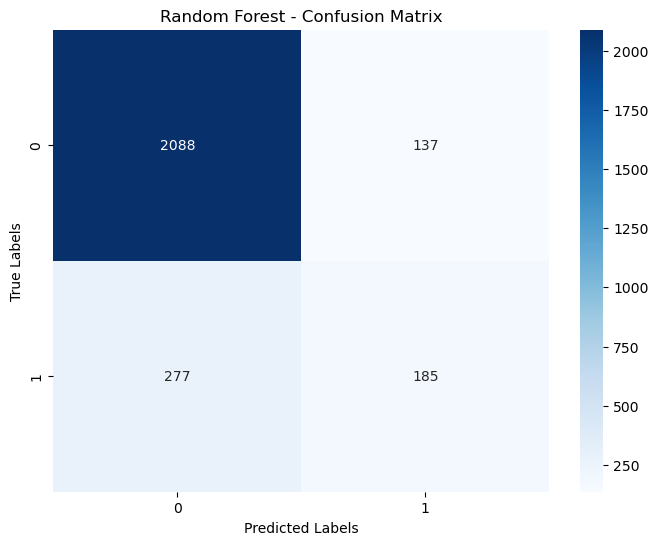

ACCURACY:  0.8459248232229252


In [32]:
cm = confusion_matrix(y_test, rf_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.title('Random Forest - Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print('ACCURACY: ',accuracy_score(y_test, rf_pred))

### 5) Lets predict our test dataset now

In [33]:
# Making predictions on the testing dataset
X_test = test  # Features in the testing dataset

y_pred = rf.predict(X_test)

In [34]:
df_test['predicted_target'] = y_pred

In [35]:
df_test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,predicted_target
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39,0.0
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72,0.0
11,9272,city_90,0.698,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,10/49,Pvt Ltd,2,51,0.0
12,14249,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,8,100-500,Other,never,48,0.0
16,7865,city_21,0.624,Male,Has relevent experience,no_enrollment,Masters,STEM,4,100-500,Pvt Ltd,1,4,1.0


<AxesSubplot:xlabel='predicted_target', ylabel='count'>

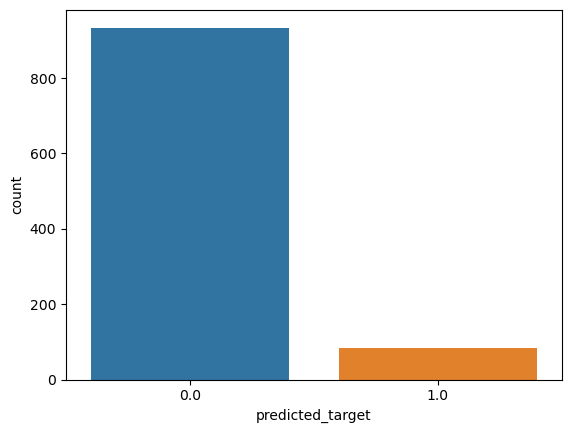

In [36]:
sns.countplot(x = df_test['predicted_target'], data = df_test)

In [37]:
df_test[df_test['predicted_target'] == 0.0].groupby('predicted_target').size()

predicted_target
0.0    934
dtype: int64

In [38]:
df_test[df_test['predicted_target'] == 1].groupby('predicted_target').size()

predicted_target
1.0    85
dtype: int64